In [11]:
from pandas import *
import matplotlib as mpl
set_option('display.notebook_repr_html',False)
mpl.rc('figure', figsize=(12, 6))
set_option('max_columns',18)
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [5]:
fec = read_csv('P00000001-ALL.txt')

/Users/user/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [10]:
parties

{'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Libertarian',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Reform',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [50]:
parties_sr = Series(parties)
#parties_sr.columns=['name','d']



In [68]:
parties_df = DataFrame(parties_sr,columns = ['party'])
parties_df['number'] = np.arange(parties_df.count())
parties_df = parties_df.reset_index('number')
parties_df.columns = ['cand_nm','party','number']
parties_df

                           cand_nm        party  number
0               Bachmann, Michelle   Republican       0
1                     Cain, Herman   Republican       1
2                   Gingrich, Newt   Republican       2
3                    Huntsman, Jon   Republican       3
4               Johnson, Gary Earl  Libertarian       4
5             McCotter, Thaddeus G   Republican       5
6                    Obama, Barack     Democrat       6
7                        Paul, Ron   Republican       7
8                Pawlenty, Timothy   Republican       8
9                      Perry, Rick   Republican       9
10  Roemer, Charles E. 'Buddy' III       Reform      10
11                    Romney, Mitt   Republican      11
12                  Santorum, Rick   Republican      12

In [71]:
merge(fec,parties_df,on=['cand_nm']).party

0         Republican
1         Republican
2         Republican
3         Republican
4         Republican
5         Republican
6         Republican
7         Republican
8         Republican
9         Republican
10        Republican
11        Republican
12        Republican
13        Republican
14        Republican
15        Republican
16        Republican
17        Republican
18        Republican
19        Republican
20        Republican
21        Republican
22        Republican
23        Republican
24        Republican
25        Republican
26        Republican
27        Republican
28        Republican
29        Republican
             ...    
536011    Republican
536012    Republican
536013    Republican
536014    Republican
536015    Republican
536016    Republican
536017    Republican
536018    Republican
536019    Republican
536020    Republican
536021    Republican
536022    Republican
536023    Republican
536024    Republican
536025    Republican
536026    Republican
536027    Rep

In [72]:
fec.cand_nm.map(parties)

0         Republican
1         Republican
2         Republican
3         Republican
4         Republican
5         Republican
6         Republican
7         Republican
8         Republican
9         Republican
10        Republican
11        Republican
12        Republican
13        Republican
14        Republican
15        Republican
16        Republican
17        Republican
18        Republican
19        Republican
20        Republican
21        Republican
22        Republican
23        Republican
24        Republican
25        Republican
26        Republican
27        Republican
28        Republican
29        Republican
             ...    
536011    Republican
536012    Republican
536013    Republican
536014    Republican
536015    Republican
536016    Republican
536017    Republican
536018    Republican
536019    Republican
536020    Republican
536021    Republican
536022    Republican
536023    Republican
536024    Republican
536025    Republican
536026    Republican
536027    Rep

In [73]:
fec['party'] = fec.cand_nm.map(parties)

In [81]:
fec.ix[0]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                 3.660103e+08
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
party                        Republican
Name: 0, dtype: object

In [86]:
fec.party.value_counts()


Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
dtype: int64

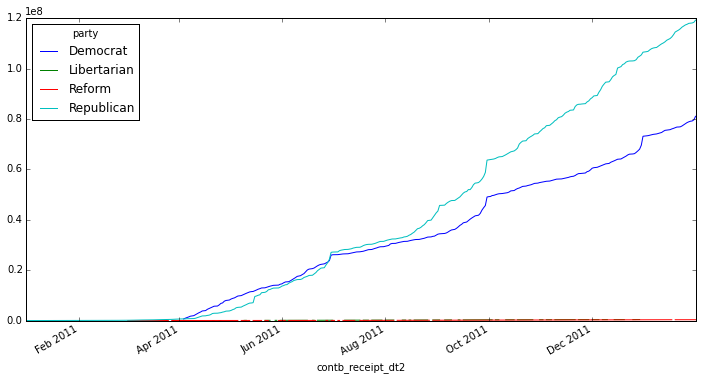

In [161]:
by_date = fec.groupby(['party','contb_receipt_dt2'])['contb_receipt_amt'].sum()
by_date.unstack('party').cumsum().plot()

In [193]:
df = by_date.unstack('party')#.stack('party')
concat([df,df], axis = 1, keys=['a','b']).stack(0)

party                  Democrat  Libertarian   Reform  Republican
contb_receipt_dt2                                                
2011-01-01        a         NaN          NaN      NaN     8600.00
                  b         NaN          NaN      NaN     8600.00
2011-01-03        a         NaN          NaN      NaN     4800.00
                  b         NaN          NaN      NaN     4800.00
2011-01-04        a         NaN          NaN      NaN     5000.00
                  b         NaN          NaN      NaN     5000.00
2011-01-12        a         NaN          NaN      NaN     4150.00
                  b         NaN          NaN      NaN     4150.00
2011-01-13        a         NaN          NaN      NaN     4000.00
                  b         NaN          NaN      NaN     4000.00
2011-01-14        a         NaN          NaN      NaN     6000.00
                  b         NaN          NaN      NaN     6000.00
2011-01-15        a         NaN          NaN      NaN      500.00
          

In [107]:
dt = mystring.split('-')

In [135]:
datetime(2001,1,1)

datetime.datetime(2001, 1, 1, 0, 0)

In [149]:
def newdate(mystring):
    dt = mystring.split('-')
#    dt = '20%s-%02d-%s' % (dt[2], int(months[dt[1]]), dt[0])
    dt = datetime( int('20'+dt[2]), int(months[dt[1]]), int(dt[0]))
    return dt
#[newdate(x) for x in fec.contb_receipt_dt]
fec['contb_receipt_dt2'] = fec.contb_receipt_dt.map(newdate)
#%timeit fec.contb_receipt_dt.apply(newdate)

In [255]:
result = fec.groupby(['cand_nm','contbr_occupation'])['contb_receipt_amt'].sum()
result = result.reset_index()
#result

In [238]:
result[:,'ZOMBIE SLAYER']


cand_nm
Paul, Ron    1556
Name: contb_receipt_amt, dtype: float64

In [257]:
#result = result.reset_index() # why is this necessary??
def top5_donors(group):
    return group.sort_index(by='contb_receipt_amt')[-5:]
top5_donors(result)
result.groupby('cand_nm').apply(top5_donors)[['contbr_occupation','contb_receipt_amt']]

                                                           contbr_occupation  \
cand_nm                                                                        
Bachmann, Michelle             920                                 PRESIDENT   
                               892                                 PHYSICIAN   
                               555                                 HOMEMAKER   
                               594                     INFORMATION REQUESTED   
                               1058                                  RETIRED   
Cain, Herman                   1536                                      CEO   
                               2225                                PHYSICIAN   
                               1897                                HOMEMAKER   
                               2389                                  RETIRED   
                               1928                    INFORMATION REQUESTED   
Gingrich, Newt                 4065     